<a href="https://colab.research.google.com/github/caxaxa/Brazilian_elections/blob/main/teste_urna_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Testando Diferença Entre Urnas de 2020 e demais

In [ ]:
#importando as Packages
import pandas as pd



In [ ]:
# #Carregando dado
df = pd.read_excel('https://brazilwasstolen.com/wp-content/uploads/2022/11/VOTOS_T1E2.xlsx', header = 1 )

# Baixa a planilha contendo as localizacoes
# lista de todas localidades, zonas e municipios oficiais do TSE


df_loc = pd.read_csv('/content/lista_localidades_tse.csv', sep = ';', encoding = 'Latin-1')

In [ ]:
# !mkdir CSVs

In [ ]:
# # Baixar os csv da base de dados do TSE

# import os
# import requests, zipfile, io

# UFs = ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'ZZ']
# # Para cada mês há dois *.zip. Os urls usam a mesma base:
# url_base =['https://cdn.tse.jus.br/estatistica/sead/eleicoes/eleicoes2022/buweb/bweb_1t_{}_051020221321.zip', 'https://cdn.tse.jus.br/estatistica/sead/eleicoes/eleicoes2022/buweb/bweb_2t_{}_311020221535.zip' ]

# def csv_downloader():
#   for i in UFs:
#     for j in url_base:
#       r = requests.get(j.format(i))
#       z = zipfile.ZipFile(io.BytesIO(r.content))
#       z.extractall("/content/CSVs")
#       print('O Estado {} deu certo'.format(i))



In [ ]:
# #Baixa e extrai os CSVs
# csv_downloader()

In [ ]:
df_loc.columns


Index(['CD_MUNICIPIO', 'NM_MUNICIPIO', 'DS_LOCAL_VOTACAO_ENDERECO',
       'NM_LOCAL_VOTACAO', 'NR_ZONA', 'NR_SECAO', 'LOC_KEY'],
      dtype='object')

In [ ]:
df_loc[(df_loc['NM_MUNICIPIO'] == 'CAMPO GRANDE') & (df_loc['NR_ZONA'] == 36)]['NM_LOCAL_VOTACAO'].unique()

array(['EE JOAQUIM MURTINHO', 'COLEGIO DOM BOSCO',
       'CENTRO COMUNITÁRIO DA IGREJA SÃO PEDRO APÓSTOLO',
       'EE PROFESSOR HENRIQUE CIRILO CORREA',
       'CENTRO UNIVERSITÁRIO DA GRANDE DOURADOS - UNIGRAN', 'SEBRAE',
       'INSTITUTO SUL MATOGROSSENSE PARA CEGOS - ISMAC',
       'ASSOCIAÇÃO ESPORTIVA E CULTURAL NIPO BRASILEIRA',
       'EE ADVOGADO DEMOSTHENES MARTINS', 'EE LÚCIA MARTINS COELHO',
       'EM PROF.  ARLINDO LIMA', 'EE SÃO JOSÉ', 'EE NICOLAU FRAGELLI',
       'EE ARTHUR DE VASCONCELOS DIAS',
       'EM PROF. LUIS ANTONIO DE SÁ CARVALHO',
       'EE JOSE MARIA HUGO RODRIGUES',
       'SALAO PAROQUIAL DA IGREJA SAO JOAO BOSCO',
       'COLEGIO NOSSA SENHORA AUXILIADORA',
       'FUNLEC - COLÉGIO PROF. LOURIVAL MARTINS FAGUNDES',
       'EE 26 DE AGOSTO', 'EE PROF. SEVERINO DE QUEIROZ',
       'COLÉGIO SÃO FRANCISCO EDUCAÇÃO INFANTIL E ENSINO FUNDAMENTAL',
       'EM JOAO DE PAULA RIBEIRO', 'CEINF-LÚCIA ÂNGELA DE CASTRO COSTA',
       'COMUNIDADE NOSSA SENHORA AUXIL

In [ ]:
#cria o campo chave para criar as localizacoes

df_loc['LOC_KEY'] = df_loc['CD_MUNICIPIO'].astype('str') + '_' + df_loc['NR_ZONA'].astype('str') + '_' + df_loc['NR_SECAO'].astype('str')

In [ ]:
#Criando uma variável para cada zona eleitoral (mudar para cada local de voto)
# Cria o campo chave para colocar a localizacao
# df[['ESTADO','ID_1','ZONA','SECAO']] = df['ID_SECAO'].str.split('_', expand = True, n=0)
# df['ID_ZONA'] = df['ID_1'] + '_' +  df['NR_ZONA'].astype('str')
df['ID_ZONA'] = df['CD_MUNICIPIO'].astype('str') + '_' +  df['NR_ZONA'].astype('str')
df['LOC_KEY'] = df['ID_ZONA'] + '_' +  df['NR_SECAO'].astype('str')

In [ ]:
# Cria o campo com as localizacoes usando pandas.merge() para fazer o mapping

# Calcula numero de secao em cada ID_zona da lista

df_to_dict = df_loc[['LOC_KEY','NM_LOCAL_VOTACAO']]

dict_loc = pd.Series(df_to_dict['NM_LOCAL_VOTACAO'].values,index=df_to_dict['LOC_KEY']).to_dict()


In [ ]:
#teste sem o dict --> nao usar Merge direto... por algum motivo dá dieferenca... preferir montar um dict e fazer o Mapping
#df['LOC_2'] = pd.merge(df_loc, df, how ='inner', on =['CD_MUNICIPIO', 'NM_MUNICIPIO','NR_ZONA', 'NR_SECAO'] )['NM_LOCAL_VOTACAO']

In [ ]:
# Usando MAP deu... usando merge nao funcionaou
df['LOC'] = df['LOC_KEY'].map(dict_loc)

0         TIRADENTES CTPM UNIDADE X - ESCOLA ESTADUAL
1         TIRADENTES CTPM UNIDADE X - ESCOLA ESTADUAL
2         TIRADENTES CTPM UNIDADE X - ESCOLA ESTADUAL
3         TIRADENTES CTPM UNIDADE X - ESCOLA ESTADUAL
4         TIRADENTES CTPM UNIDADE X - ESCOLA ESTADUAL
                             ...                     
472016                                            NaN
472017                                            NaN
472018                                            NaN
472024                                            NaN
472025                                            NaN
Name: LOC_2, Length: 461764, dtype: object

In [ ]:
df[['ID_SECAO', 'NR_ZONA', 'SECAO','LOC']] # Novos dados, fazer um MAP de CD_MUN, NR_ZONA_SECAO

,ID_SECAO,NR_ZONA,SECAO,LOC
0,AC_1007_9_1,9,1,ESCOLA EDMUNDO PINTO DE ALMEIDA NETO
1,AC_1007_9_2,9,2,ESCOLA EDMUNDO PINTO DE ALMEIDA NETO
2,AC_1007_9_3,9,3,ESCOLA EDMUNDO PINTO DE ALMEIDA NETO
3,AC_1007_9_4,9,4,ESCOLA EDMUNDO PINTO DE ALMEIDA NETO
4,AC_1007_9_5,9,5,ESCOLA SÃO JOÃO BATISTA
...,...,...,...,...
472016,ZZ_39160_1_1902,1,1902,LIUBLIANA
472017,ZZ_39209_1_1069,1,1069,BRATISLAVA
472018,ZZ_39306_1_925,1,925,ISTAMBUL-CONSULADO GERAL DO BRASIL
472024,ZZ_99317_1_1282,1,1282,TALIN


In [ ]:
n_zonas = len(df['ID_ZONA'].unique())
print('Há {} zonas diferentes no Brasil'.format(str(n_zonas)))

Há 6207 zonas diferentes no Brasil


In [ ]:
n_loc = len(df['LOC'].unique())
print('Há {} localidades diferentes no Brasil'.format(str(n_loc)))

Há 84496 localidades diferentes no Brasil


In [ ]:
#tirando as colunas sem informacao do modelo de urna ()
df = df[df['LOG_MODELO']!= '-']


In [ ]:
#Estudando um exemplo
df[(df['NM_MUNICIPIO']== 'CAMPO GRANDE') & (df['UF']== 'MS') & (df['NR_ZONA']== 36)]['LOC'].unique()

array(['ASSOCIAÇÃO ESPORTIVA E CULTURAL NIPO BRASILEIRA',
       'EE JOAQUIM MURTINHO', 'EM PROF.  ARLINDO LIMA',
       'CENTRO UNIVERSITÁRIO DA GRANDE DOURADOS - UNIGRAN',
       'COLEGIO DOM BOSCO', 'COLEGIO NOSSA SENHORA AUXILIADORA',
       'EE LÚCIA MARTINS COELHO', 'EM PROF. LUIS ANTONIO DE SÁ CARVALHO',
       'EE NICOLAU FRAGELLI', 'EE SÃO JOSÉ', 'EE 26 DE AGOSTO',
       'COLÉGIO SÃO FRANCISCO EDUCAÇÃO INFANTIL E ENSINO FUNDAMENTAL',
       'EE PROF. SEVERINO DE QUEIROZ',
       'EE PROFESSOR HENRIQUE CIRILO CORREA',
       'SALAO PAROQUIAL DA IGREJA SAO JOAO BOSCO',
       'ESCOLA ALEXANDER FLEMING',
       'ESCOLA HARMONIA BILÍNGUE - UNIDADE III',
       'EM PROFESSORA DANDA NUNES',
       'CESUMAR - CENTRO DE ENSINO SUPERIOR DE MARINGÁ',
       'EE ADVOGADO DEMOSTHENES MARTINS', 'EM ETALIVIO PEREIRA MARTINS',
       'CENTRO COMUNITÁRIO DA IGREJA SÃO PEDRO APÓSTOLO',
       'EM CORONEL ANTONINO', 'EE JOELINA ALMEIDA XAVIER',
       'EE ARTHUR DE VASCONCELOS DIAS', 'EE PADRE

In [ ]:
#Criando a variável diferenca percentual
df['diff_media'] = (df['T2QT22'] -	df['T2QT13'])/df['T2QTVAL']	

In [ ]:
# Agrupa Zonas e modelos de urna, e conta quantas observacoes únicas existem
# A terceira coluna mostra o número de zonas e modelos de urna únicos
df_zona_modelo = df.groupby(['ID_ZONA', 'LOG_MODELO','LOG_FG2020']).size()

In [ ]:
# Agora com Localidades
df_loc_modelo = df.groupby(['LOC', 'LOG_MODELO','LOG_FG2020']).size()
df_loc_modelo = pd.DataFrame(df_loc_modelo).reset_index()
df_loc_modelo

,LOC,LOG_MODELO,LOG_FG2020,0
0,(ANTIGA) ESCOLA MUNICIPAL FLORENCIO DE ABREU,UE2009,0,1
1,(APAE) CRAEE,UE2010,0,3
2,(BRIZOLINHA) ESCOLA ESTADUAL GILBERTO FREIRE,UE2009,0,2
3,(CAIC) EETI DOM ANTONIO CAMPELO DE ARAGÃO,UE2010,0,4
4,(CAIC)ESCOLA MUNICIPAL CAPITÃO WAGNER,UE2009,0,18
...,...,...,...,...
98503,ÍNDIO MARAJÓ E.E. INDÍGENA,UE2015,0,2
98504,ÍNDIO MAURO E.E INDÍGENA,UE2015,0,1
98505,ÓRBIS CLUBE,UE2015,0,1
98506,ÓZIMO LOPES DOS SANTOS (EMEF -D-19 (SANTA CRUZ),UE2020,1,1


In [ ]:
# Aqui eu conto quantas zonas possuem mais de um tipo de urna
df_zonas_audit = df_zona_modelo.groupby(['ID_ZONA']).size()

df_zonas_audit = pd.DataFrame(df_zonas_audit.sort_values(ascending = False))

df_zonas_audit = df_zonas_audit.reset_index()

#double checking
#df_zona_modelo.pivot_table(columns=['ID_ZONA'], aggfunc='size').sort_values(ascending = False)

In [ ]:
# Agora com Localidades
df_loc_audit = df_loc_modelo.groupby(['LOC']).size()

df_loc_audit = pd.DataFrame(df_loc_audit.sort_values(ascending = False))

df_loc_audit = df_loc_audit.reset_index()

#double checking
#df_loc_modelo.pivot_table(columns=['ID_ZONA'], aggfunc='size').sort_values(ascending = False)

In [ ]:
#cria a lista de zonas para serem estudadas (Aquelas que tiverem ao menos mais de dois tipos de urna)
lista_de_zonas_1 = df_zonas_audit[df_zonas_audit[0] > 1]['ID_ZONA']

In [ ]:
#retira as zonas que tem mais de um tipo de urna, porém nao tem nenhuma modelo 2020
lista_de_zonas_2 = df[(df['ID_ZONA'].isin(lista_de_zonas_1))][['ID_ZONA','LOG_FG2020']]
lista_de_zonas_2 = lista_de_zonas_2.groupby('ID_ZONA').sum().reset_index()

lista_de_zonas_2 = lista_de_zonas_2[lista_de_zonas_2['LOG_FG2020']!= 0]['ID_ZONA']
lista_de_zonas_2

45       1392_1
46       1392_9
61       1538_8
94       2550_1
95       2550_2
         ...   
1739    93858_2
1749    95192_7
1755    95591_3
1757    9571_57
1765    9652_80
Name: ID_ZONA, Length: 459, dtype: object

In [ ]:
#Agora com localidades
#cria a lista de loc para serem estudadas (Aquelas que tiverem ao menos mais de dois tipos de urna)
lista_de_loc_1 = df_loc_audit[df_loc_audit[0] > 1]['LOC']
lista_de_loc_2 = df[(df['LOC'].isin(lista_de_loc_1))][['LOC','LOG_FG2020']]
lista_de_loc_2 = lista_de_loc_2.groupby('LOC').sum().reset_index()

lista_de_loc_2 = lista_de_loc_2[lista_de_loc_2['LOG_FG2020']!= 0]['LOC']
lista_de_loc_2

9                                                    AABB
16                                        AGENCIA DO INSS
17                                        AGÊNCIA DO INSS
44                                                   APAE
46      APAE - ASSOCIAÇÃO DE PAIS E AMIGOS DOS EXCEPCI...
                              ...                        
9229               UNIVERSIDADE CRUZEIRO DO SUL - UNICSUL
9237                           UNIVERSIDADE ESTACIO DE SA
9245                           UNIVERSIDADE ESTÁCIO DE SÁ
9256                                               UNOPAR
9259                     USF - UNIVERSIDADE SÃO FRANCISCO
Name: LOC, Length: 1434, dtype: object

In [ ]:

df_calculo = df[(df['ID_ZONA'].isin(lista_de_zonas_2)) ][['ID_ZONA','LOG_MODELO','LOG_FG2020','diff_media','SECAO']]


In [ ]:
df_final = df_calculo.groupby(['ID_ZONA', 'LOG_FG2020']).mean().reset_index()

In [ ]:
df_final.groupby('LOG_FG2020').mean()

,diff_media
LOG_FG2020,
0,0.140039
1,0.176183


In [ ]:
df_final.groupby('LOG_FG2020').count()

,ID_ZONA,diff_media
LOG_FG2020,,
0,459,459
1,459,459


In [ ]:
# com loc
df_calculo_loc = df[(df['LOC'].isin(lista_de_loc_2)) ][['LOC','LOG_MODELO','LOG_FG2020','diff_media','SECAO']]
df_final_loc = df_calculo_loc.groupby(['LOC', 'LOG_FG2020']).mean().reset_index()

In [ ]:
df_final_loc.groupby('LOG_FG2020').mean()

,diff_media
LOG_FG2020,
0,-0.131663
1,-0.092446


In [ ]:
df_final_loc.groupby('LOG_FG2020').count()

,LOC,diff_media
LOG_FG2020,,
0,1434,1434
1,1434,1434


In [ ]:
dist = []
dist = pd.DataFrame(dist)

dist['U2020'] = df_final[df_final['LOG_FG2020'] == 1]['diff_media'].values
dist['U2XXX'] = df_final[df_final['LOG_FG2020'] == 0]['diff_media'].values




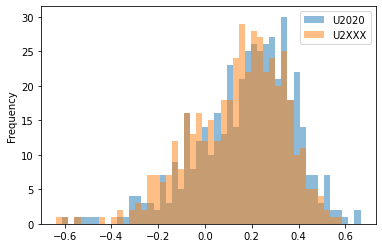

In [ ]:
dist.plot.hist(alpha = 0.5, bins = 50 )

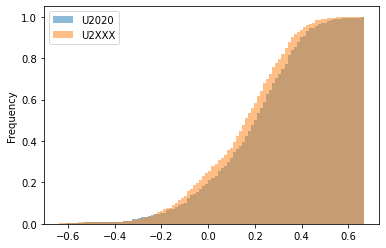

In [ ]:
dist.plot.hist(cumulative=True, density=1, bins=100, alpha=0.5)

In [ ]:
dist_loc = []
dist_loc = pd.DataFrame(dist_loc)

dist_loc['U2020'] = df_final_loc[df_final_loc['LOG_FG2020'] == 1]['diff_media'].values
dist_loc['U2XXX'] = df_final_loc[df_final_loc['LOG_FG2020'] == 0]['diff_media'].values


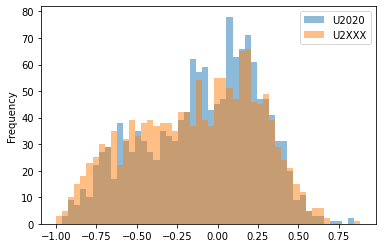

In [ ]:
dist_loc.plot.hist(alpha = 0.5, bins = 50 )

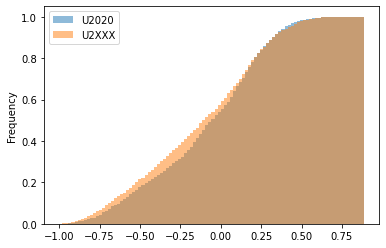

In [ ]:
dist_loc.plot.hist(cumulative=True, density=1, bins=100, alpha=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1435bed190>]],
      dtype=object)

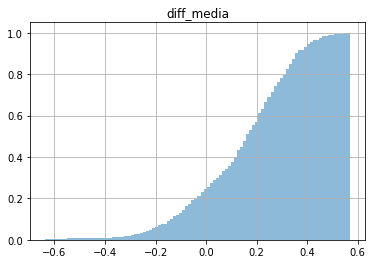

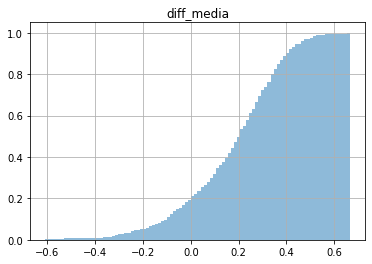

In [ ]:
df_final[df_final['LOG_FG2020'] == 0][['diff_media']].hist(cumulative=True, density=1, bins=100, alpha=0.5)
df_final[df_final['LOG_FG2020'] == 1][['diff_media']].hist(cumulative=True, density=1, bins=100, alpha=0.5)

In [ ]:
#Rodar o teste Kolmogorov-Simirnov pra testar se as distrinuições são diferentes
from scipy import stats
import matplotlib.pyplot as plt 
import numpy as np

U2020 = np.array(df_final[df_final['LOG_FG2020'] == 1]['diff_media']).cumprod()
U2XXX = np.array(df_final[df_final['LOG_FG2020'] == 0]['diff_media']).cumprod()

stats.kstest(U2020, U2XXX, alternative = 'less')

KstestResult(statistic=0.10675381263616558, pvalue=0.005325805612974558)

In [ ]:
#agora com localidadesD
U2020 = np.array(df_final_loc[df_final_loc['LOG_FG2020'] == 1]['diff_media']).cumprod()
U2XXX = np.array(df_final_loc[df_final_loc['LOG_FG2020'] == 0]['diff_media']).cumprod()

stats.kstest(U2020, U2XXX, alternative = 'less')

KstestResult(statistic=0.043235704323570434, pvalue=0.06852791284394798)

## Teste de robustez

Rodar o Kolmogorv-Smirnov em amostras aleatórias das mesmas zonas.



In [ ]:
# Calcula numero de secao em cada ID_zona da lista

df_to_dict = df_calculo[['ID_ZONA', 'SECAO']].groupby(['ID_ZONA']).count().reset_index()

dict_1 = pd.Series(df_to_dict['SECAO'].values,index=df_to_dict['ID_ZONA']).to_dict()





In [ ]:
from random import randint, seed

In [ ]:
# Monta a funcao que gera as amostras
def sampler(): #fixar uma seed para publicar depois
  sample = np.zeros(len(lista_de_zonas_2))
  for i,j,k in zip(dict_1.keys(),range(len(dict_1.keys())), dict_1.values()):
    sample[j] = df_calculo[df_calculo['ID_ZONA']==i]['diff_media'].values[randint(1,k-1)]
  return sample



In [ ]:
#Criando as amostras aleatórias de cada zona eleitoral escolhida

sample_1 = sampler()
sample_2 = sampler()
sample_3 = sampler()
sample_4 = sampler()

### Testando KS test


In [ ]:
stats.kstest(sample_1, sample_2, alternative = 'less')

KstestResult(statistic=0.023965141612200435, pvalue=0.7684692272476434)

In [ ]:
stats.kstest(sample_1, sample_3, alternative = 'less')

KstestResult(statistic=0.02178649237472767, pvalue=0.8044109951144597)

In [ ]:
stats.kstest(sample_1, sample_4, alternative = 'less')

KstestResult(statistic=0.010893246187363835, pvalue=0.9470456175738061)

In [ ]:
stats.kstest(sample_2, sample_4, alternative = 'less')

KstestResult(statistic=0.04357298474945534, pvalue=0.4186223198571778)

In [ ]:
stats.kstest(sample_3, sample_4, alternative = 'less')

KstestResult(statistic=0.030501089324618737, pvalue=0.6527138536209176)

In [ ]:
stats.kstest(sample_2, sample_3, alternative = 'less')

KstestResult(statistic=0.026143790849673203, pvalue=0.7309431291017925)

In [ ]:
# Calcula numero de secao em cada LOC da lista

df_to_dict = df_calculo_loc[['LOC', 'SECAO']].groupby(['LOC']).count().reset_index()

dict_1 = pd.Series(df_to_dict['SECAO'].values,index=df_to_dict['LOC']).to_dict()

# Monta a funcao que gera as amostras
def sampler(): #fixar uma seed para publicar depois
  sample = np.zeros(len(lista_de_loc_2))
  for i,j,k in zip(dict_1.keys(),range(len(dict_1.keys())), dict_1.values()):
    sample[j] = df_calculo_loc[df_calculo_loc['LOC']==i]['diff_media'].values[randint(1,k-1)]
  return sample


In [ ]:

sample_1 = sampler()
sample_2 = sampler()
sample_3 = sampler()
sample_4 = sampler()

In [ ]:
stats.kstest(sample_1, sample_2, alternative = 'less')

KstestResult(statistic=0.017433751743375175, pvalue=0.6468027376139612)

In [ ]:
stats.kstest(sample_1, sample_3, alternative = 'less')

KstestResult(statistic=0.017433751743375175, pvalue=0.6468027376139612)

In [ ]:
stats.kstest(sample_4, sample_2, alternative = 'less')

KstestResult(statistic=0.015341701534170154, pvalue=0.713614053054277)

In [ ]:
stats.kstest(sample_1, sample_4, alternative = 'less')

KstestResult(statistic=0.01394700139470014, pvalue=0.7566520114367521)